In [2]:
from scipy.linalg import lu
import numpy as np
A = np.loadtxt('/home/taosimin/iEDA24/iEDA/bin/matrix.txt')
print(A.shape)
print(A[0])

(28153, 28153)
[1000.112343    0.          0.       ...    0.          0.
    0.      ]


In [ ]:
from scipy.sparse import csr_matrix
A_csr = csr_matrix(A)

In [5]:
# Function to print each row of the CSR matrix
def print_csr_matrix_rows(csr_mat):
    for i in range(0, 10):
        start_idx = csr_mat.indptr[i]
        end_idx = csr_mat.indptr[i + 1]
        row_data = csr_mat.data[start_idx:end_idx]
        row_indices = csr_mat.indices[start_idx:end_idx]
        print(f"Row {i}:")
        for j in range(len(row_data)):
            print(f"  Column {row_indices[j]}: {row_data[j]}")
        print()

# Print each row of the CSR matrix
print_csr_matrix_rows(A_csr)

Row 0:
  Column 0: 1000.112343
  Column 7: -0.033141
  Column 8: -0.079202
  Column 2487: -1000.0

Row 1:
  Column 1: 1000.104879
  Column 8: -0.035135
  Column 26: -0.069745
  Column 2504: -1000.0

Row 2:
  Column 2: 1000.037383
  Column 26: -0.037383
  Column 2513: -1000.0

Row 3:
  Column 3: 1000.135631
  Column 9: -0.031788
  Column 10: -0.103842
  Column 739: -1000.0

Row 4:
  Column 4: 1000.156442
  Column 10: -0.030148
  Column 11: -0.126295
  Column 844: -1000.0

Row 5:
  Column 5: 1000.088168
  Column 9: -0.088168
  Column 634: -1000.0

Row 6:
  Column 6: 1000.189802
  Column 11: -0.028668
  Column 12: -0.161134
  Column 876: -1000.0

Row 7:
  Column 0: -0.033141
  Column 7: 1000.124767
  Column 22: -0.091625
  Column 1934: -1000.0

Row 8:
  Column 0: -0.079202
  Column 1: -0.035135
  Column 8: 1000.114336
  Column 2031: -1000.0

Row 9:
  Column 3: -0.031788
  Column 5: -0.088168
  Column 9: 1000.119956
  Column 2257: -1000.0



In [ ]:
current = np.loadtxt('/home/taosimin/iEDA24/iEDA/bin/current.txt')
print(current.shape)
print(current)

(28153,)
[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.399728e-10 -2.399728e-10
  8.100000e+08]


In [4]:
voltage = np.loadtxt('/home/taosimin/iEDA24/iEDA/bin/voltage.txt')
print(voltage.shape)
print(voltage)

(29341,)
[ 8.076774e-01  8.076774e-01  8.076906e-01 ... -2.998906e+05 -2.998906e+05
  8.100000e-01]


In [14]:
init = np.ones_like(current) * 0.81 * 0.9
print(init)

[0.729 0.729 0.729 ... 0.729 0.729 0.729]


In [ ]:
import numpy as np
import pdb

def feature_enhancer(feature, target, init=None, tol=1e-6, maxiter=100):
    N = len(target)
    if init is None:
        enhanced_feature = np.zeros(N, dtype=float)
    else:
        enhanced_feature = np.array(init, dtype=float)
        if not (enhanced_feature.shape == (N,1) or enhanced_feature.shape == (N,)):
            raise ValueError('shapes of feature {} and x0 {} are incompatible'
               .format(feature.shape, enhanced_feature.shape))
    enhanced_feature = enhanced_feature.ravel()

    residual = target - feature.dot(enhanced_feature)    
    
    print(residual)
    # pdb.set_trace()
    
    p = residual.copy()
    r_dot_r = np.dot(residual, residual)

    for i in range(maxiter):
        Ap = feature.dot(p)
        alpha = r_dot_r / np.dot(p, Ap)
        enhanced_feature += alpha * p
        residual -= alpha * Ap

        r_dot_r_new = np.dot(residual, residual)
        beta = r_dot_r_new / r_dot_r
        p = residual + beta * p
        r_dot_r = r_dot_r_new

        if r_dot_r < tol:
            break
    return enhanced_feature, i


In [ ]:
enhanced_feature, num_iter =feature_enhancer(A, current, init=init, tol=1e-6, maxiter=10000)
print("enhanced_feature: ", enhanced_feature)
print("num_iter: ", num_iter)

[ 0.00000000e+00  7.29000021e-07  0.00000000e+00 ... -2.25420885e-10
 -2.39972800e-10  8.10000000e+07]
> /tmp/ipykernel_2489840/1826088486.py(20)feature_enhancer()
     18     pdb.set_trace()
     19 
---> 20     p = residual.copy()
     21     r_dot_r = np.dot(residual, residual)
     22 



In [24]:
print(init)
print(init.shape)

[0.64 0.64 0.64 ... 0.64 0.64 0.64]
(29341,)


In [25]:
import numpy as np
from scipy.sparse.linalg import cg

# Solve the system AX = b using the Conjugate Gradient method
x, info = cg(A, current, x0=init, tol=1e-6, maxiter=10000)

# Print the solution and the convergence information
print("Solution X:\n", x)
print("Convergence info:", info)

Solution X:
 [0.64       0.64       0.64       ... 0.64000006 0.64000006 0.80999837]
Convergence info: 0


In [9]:
import numpy as np
residual = np.loadtxt('/home/taosimin/iEDA/bin/residual.txt')
# print(residual.shape)
print(residual[1892025])
# max = np.max(residual)
# print(max)

# 找出为 NaN 的元素下标
nan_indices = np.where(np.isnan(residual))[0]

# 打印 NaN 元素的下标
print("Indices of NaN elements in residual:\n", nan_indices)

# r_dot_r = np.dot(residual, residual)
# print(r_dot_r)

nan
Indices of NaN elements in residual:
 [1892025 1893826 1896329 1896496 1897411 1910149 1910164 1910165 1910166
 1910177 1910182 1910185 1910186 1910188 1910539 1910542 1910544 1910545
 1910556 1910562 1910565 1910566 1910569 1910819 1910822 1910828 1910829
 1910833 1910840 1910848 1911142 1911143 1911151 1911158 1911162 1911166
 1911170 1911171]


In [10]:
import numpy as np
Ax = np.loadtxt('/home/taosimin/iEDA/bin/Ax.txt')
b = np.loadtxt('/home/taosimin/iEDA/bin/b.txt')

print("Ax: ", Ax[1892025])
print("b: ", b[1892025])

Ax:  0.0
b:  nan


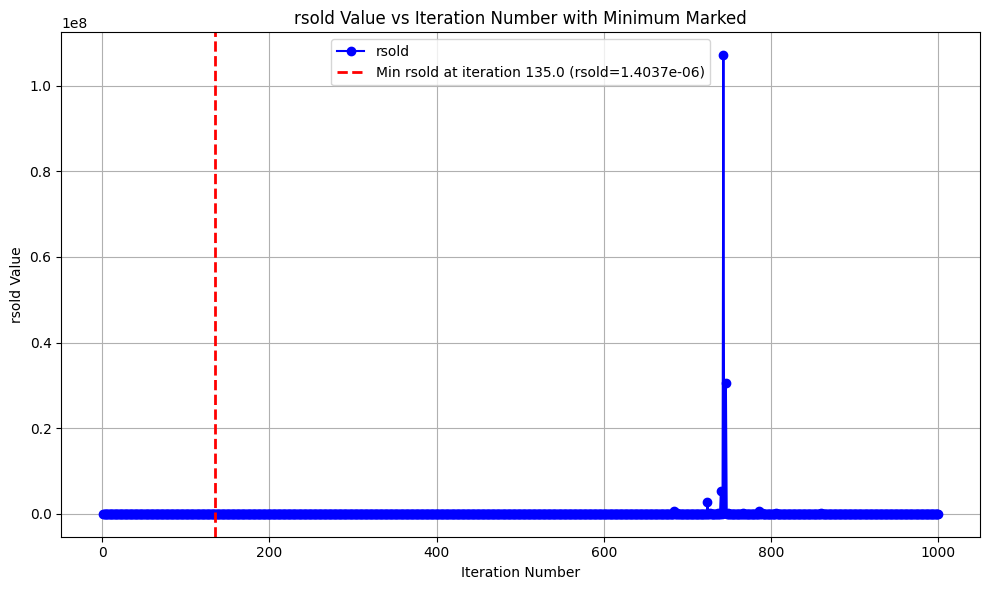

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据
filename = "/home/taosimin/ysyx_test25/2025-04-28/sta_debug/rsold.csv"
df = pd.read_csv(filename)

# 2. 找到 rsold 最小值的索引和对应的迭代次数
min_rsold_row = df.loc[df['rsold'].idxmin()]

iteration_min_rsold = min_rsold_row['iteration']
min_rsold_value = min_rsold_row['rsold']

# 3. 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(df['iteration'], df['rsold'], marker='o', linestyle='-', color='b', label='rsold')

# 4. 添加红色垂直虚线，标记最小值所在迭代次数
plt.axvline(x=iteration_min_rsold, color='r', linestyle='--', linewidth=2,
            label=f"Min rsold at iteration {iteration_min_rsold} (rsold={min_rsold_value:.4e})")

# 5. 添加标注
plt.xlabel('Iteration Number')
plt.ylabel('rsold Value')
plt.title('rsold Value vs Iteration Number with Minimum Marked')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 6. 显示图像
plt.show()